## Campos involucrados

- escuelascercanas
- centroscomercialescercanos
- idzona

## Ideas

- Agregar info externa (transporte cercano? barrios "de moda"?)
- Caracterización de zona
  - Centro Geográfico
  - ¿diámetro?
  - Promedios
    - metroscubiertos
    - precio
    - ...
- Armar un dataframe con info de zonas?

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point

In [2]:
#importo las funciones para levantar los dataframes
%run "../../utils/dataset_parsing.ipynb"
#importo las funciones para graficar
%run "../../utils/graphs.ipynb"
df = levantar_datos("../../"+DATASET_RELATIVE_PATH)
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'mes', 'ano', 'dia'],
      dtype='object')

In [3]:
df["precio_metro_cubierto"] = df["precio"] / df["metroscubiertos"]
df["precio_metro_total"] = df["precio"] / df["metrostotales"]

In [4]:
promedios = df.groupby(["idzona"]).agg({"id": "count", "precio_metro_total": ["mean","std"], "precio_metro_cubierto": ["mean","std"]}).fillna(0).astype(int)
promedios.columns = ["publicaciones", "promedio_metrostotales", "desvio_metrostotales", "promedio_metroscubiertos","desvio_metroscubiertos"]
promedios.index = promedios.index.astype(int)
promedios.head()

,publicaciones,promedio_metrostotales,desvio_metrostotales,promedio_metroscubiertos,desvio_metroscubiertos
idzona,,,,,
22,15,22044,11082,24215,13060
23,26,8136,3078,6918,2533
26,10,5617,2043,6492,1341
27,1,6190,0,7222,0
28,2,6875,4419,5481,1122


In [5]:
promedios.loc[promedios.index == 74]

,publicaciones,promedio_metrostotales,desvio_metrostotales,promedio_metroscubiertos,desvio_metroscubiertos
idzona,,,,,
74,3,9250,750,7072,1625


In [6]:
# me quedo con las zonas que tengan más publicaciones y ordeno por precio 
top_100_publicaciones = promedios.sort_values(by="publicaciones", ascending=False).head(100).sort_values(by="promedio_metroscubiertos", ascending=False)
# 10 barrios más caros
top_10 = top_100_publicaciones.head(10)
# 10 barrios más baratos
last_10 = top_100_publicaciones.tail(10)

## Armo un Dataframe donde las filas son las zonas

In [7]:
calculations = ["mean","std","max","min"]
aggregations = {"id": "count",\
                "precio_metro_total": calculations,\
                "precio_metro_cubierto": calculations,\
                "antiguedad": calculations,\
                "habitaciones": calculations,\
                "metroscubiertos": calculations,\
                "metrostotales": calculations,\
                "lat": calculations,\
                "lng": calculations,\
                "precio": calculations,\
                "habitaciones": calculations,\
                "garages": calculations,\
                "banos": calculations,\
               }
zonas = df.groupby(["idzona"]).agg(aggregations)
zonas.columns = [x+"_"+y for x,y in zonas.columns]

In [8]:
zonas.head()

,id_count,precio_metro_total_mean,precio_metro_total_std,precio_metro_total_max,precio_metro_total_min,precio_metro_cubierto_mean,precio_metro_cubierto_std,precio_metro_cubierto_max,precio_metro_cubierto_min,antiguedad_mean,...,precio_max,precio_min,garages_mean,garages_std,garages_max,garages_min,banos_mean,banos_std,banos_max,banos_min
idzona,,,,,,,,,,,,,,,,,,,,,
22.0,15,22044.491681,11082.393826,40079.365079,5865.000000,24215.438553,13060.759829,46666.666667,5190.311419,2.533203,...,12500000.0,316710.0,1.071289,0.729980,2.0,0.0,2.000000,0.816406,3.0,1.0
23.0,26,8136.115904,3078.807635,15000.000000,4010.416667,6918.916093,2533.223702,13793.103448,3843.750000,10.953125,...,4000000.0,385000.0,1.117188,0.927734,3.0,0.0,2.226562,0.922363,4.0,1.0
26.0,10,5617.013889,2043.191336,10312.500000,2300.000000,6492.125563,1341.220141,8625.000000,4204.545455,20.109375,...,1650000.0,616400.0,1.111328,0.601074,2.0,0.0,2.222656,0.666504,3.0,1.0
27.0,1,6190.476190,NaN,6190.476190,6190.476190,7222.222222,NaN,7222.222222,7222.222222,10.000000,...,650000.0,650000.0,1.000000,NaN,1.0,1.0,1.000000,NaN,1.0,1.0
28.0,2,6875.000000,4419.417382,10000.000000,3750.000000,5481.004902,1122.185394,6274.509804,4687.500000,17.500000,...,1600000.0,750000.0,1.500000,0.707031,2.0,1.0,2.000000,0.000000,2.0,2.0


In [9]:
zonas["lat_dif"] = zonas["lat_max"] - zonas["lat_min"]
zonas["lng_dif"] = zonas["lng_max"] - zonas["lng_min"]

In [10]:
zonas["has_gps"] = (~zonas["lat_mean"].isna()) & (zonas["lat_mean"] > 10) & (zonas["lng_mean"] < -80)

In [11]:
zonas.has_gps.value_counts()

True     14830
False     4889
Name: has_gps, dtype: int64

In [12]:
# dimensiones (en cantidad de publicaciones) de las zonas que no tienen info gps
zonas.loc[~zonas["has_gps"]]["id_count"].sort_values(ascending=False).head()

idzona
125606.0    50
49336.0     46
106955.0    37
55074.0     25
69319.0     24
Name: id_count, dtype: int64

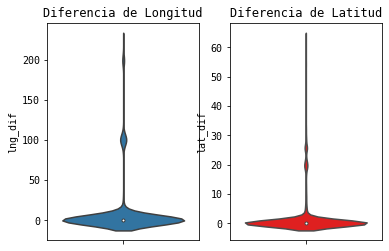

In [13]:
zonas_con_gps = zonas.loc[(zonas.has_gps) & (zonas.id_count > 10)]
zonas_con_gps = zonas_con_gps.loc[z]

def doble_violin(serie_izq, serie_der, titulo_izq, titulo_der):
    fig, ax = plt.subplots(1,2)
    plot_lng = sns.violinplot(serie_izq, orient="v", ax=ax[0])
    plot_lng.set_title(titulo_izq)
    plot_lat = sns.violinplot(serie_der, orient="v", color="red", ax=ax[1])
    plot_lat.set_title(titulo_der)
    return fig

plot = doble_violin(zonas_con_gps.lng_dif, zonas_con_gps.lat_dif, "Diferencia de Longitud", "Diferencia de Latitud")

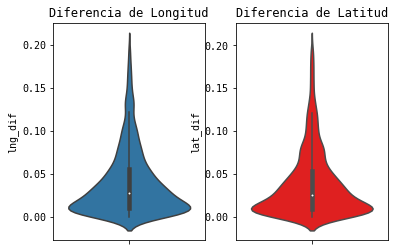

In [14]:
# en base a esto, me quedo con las zonas que tienen:
max_dif_lng, max_dif_lat = 0.2, 0.2
zonas_ok = zonas_con_gps.loc[(zonas_con_gps.id_count > 5) & (zonas_con_gps.lat_dif < max_dif_lat) & (zonas_con_gps.lng_dif < max_dif_lng)]
plot = doble_violin(zonas_ok.lng_dif, zonas_ok.lat_dif, "Diferencia de Longitud", "Diferencia de Latitud")

In [15]:
zonas_ok.loc[zonas_ok.lat_mean < 10]
zonas_ok.loc[zonas_ok.lat_mean < 10]

,id_count,precio_metro_total_mean,precio_metro_total_std,precio_metro_total_max,precio_metro_total_min,precio_metro_cubierto_mean,precio_metro_cubierto_std,precio_metro_cubierto_max,precio_metro_cubierto_min,antiguedad_mean,...,garages_std,garages_max,garages_min,banos_mean,banos_std,banos_max,banos_min,lat_dif,lng_dif,has_gps
idzona,,,,,,,,,,,,,,,,,,,,,


In [16]:
df.loc[df.idzona==70108.0][["lat","lng"]]

,lat,lng
39010,NaN,NaN
67263,NaN,NaN
90186,NaN,NaN
127500,0.0,0.0
147771,NaN,NaN
158437,NaN,NaN
192306,0.0,0.0
216685,NaN,NaN
229753,NaN,NaN
235961,NaN,NaN


In [22]:
zonas_ok.loc[:,"coord"] = zonas_ok.apply(lambda x: Point(x["lng_mean"],x["lat_mean"]), axis=1)

In [24]:
zonas_ok["en_mexico"] = zonas_ok["coord"].map(esta_en_mexico)

In [25]:
geoDF = geopandas.GeoDataFrame(zonas_ok, geometry="coord")

In [26]:
pais = geopandas.read_file("./MEX_adm/MEX_adm0.shp")
estados = geopandas.read_file("./MEX_adm/MEX_adm1.shp")

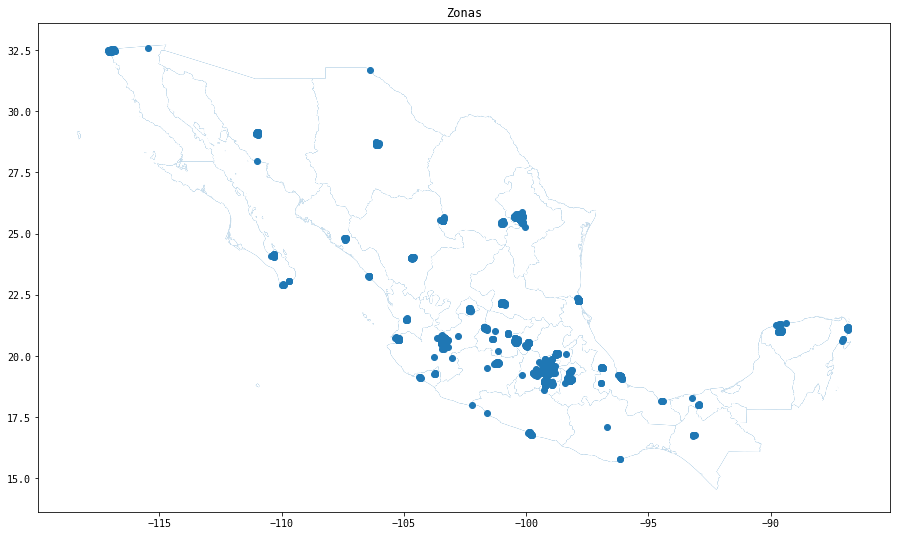

In [27]:
base = pais.plot(figsize=(18,9))
base.set_title("Zonas")
estados_plot = estados.plot(ax=base, color="white")
geoDF.plot(ax=estados_plot)

In [28]:
geoDF.lng_mean.describe()

count    2669.000000
mean     -100.432192
std         4.221894
min      -117.112776
25%      -101.345953
50%       -99.258624
75%       -99.114093
max       -86.821099
Name: lng_mean, dtype: float64